In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay

In [42]:
df=pd.read_csv(r"C:\Users\Devesh Atole\Desktop\ML\MLearing data\diabtic\diabetes_prediction_dataset.csv")

In [43]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [44]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [45]:
df.info()             # to study and understand the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Perfoming EDA 
before buliding our ML model we have to perfom eda  

In [46]:
df.isnull().sum()            ## To check empty or null records but the there are no empty records 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [47]:
df.duplicated().sum()            ## to check duplicate records , we have 3854 duplicate recods 

3854

In [48]:
df.drop_duplicates(inplace=True)            ## Deleted duplicate records because our ml model cannot predict perfectly 

In [49]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: xlabel='bmi'>

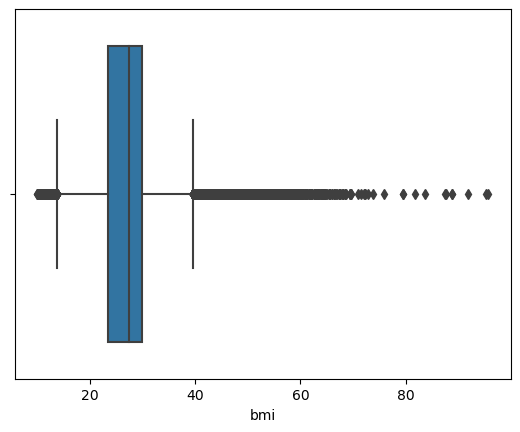

In [50]:
sns.boxplot(data=df,x="bmi")     ## To see the distribution of bmi data

In [51]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['bmi'], 25)
Q3 = np.percentile(df['bmi'], 75)
IQR = Q3 - Q1

In [52]:
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

13.709999999999997 39.55


In [53]:
# remove the outliers
df = df[(df['bmi'] >= lower_limit) & (df['bmi'] <= upper_limit)]

<Axes: xlabel='bmi'>

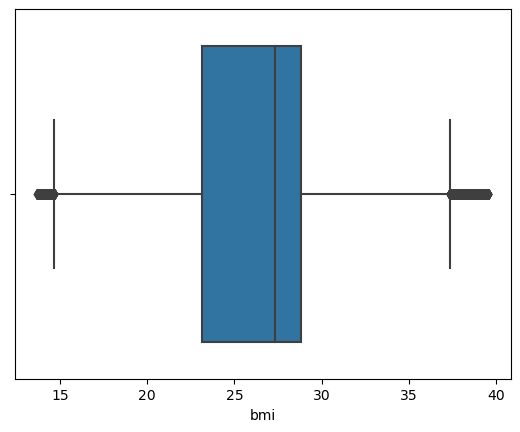

In [54]:
sns.boxplot(data=df,x="bmi")       ## After removing outliers 

<Axes: xlabel='HbA1c_level'>

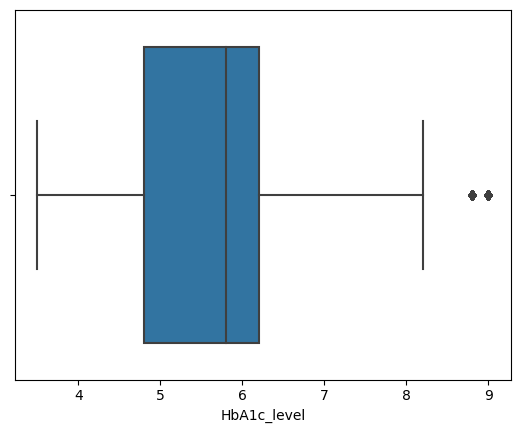

In [55]:
sns.boxplot(data=df,x="HbA1c_level")     ## To see the distribution of HbA1c_level data

In [56]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['HbA1c_level'], 25)
Q3 = np.percentile(df['HbA1c_level'], 75)
IQR = Q3 - Q1

In [57]:
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

2.6999999999999993 8.3


In [58]:
# remove the outliers
df = df[(df['HbA1c_level'] >= lower_limit) & (df['HbA1c_level'] <= upper_limit)]

<Axes: xlabel='HbA1c_level'>

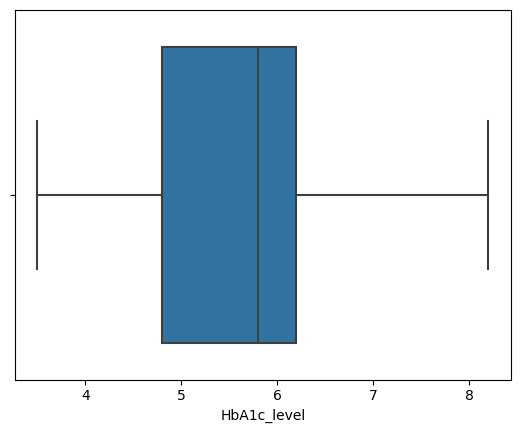

In [38]:
sns.boxplot(data=df,x="HbA1c_level")       ## After removing outliers 

<Axes: xlabel='blood_glucose_level'>

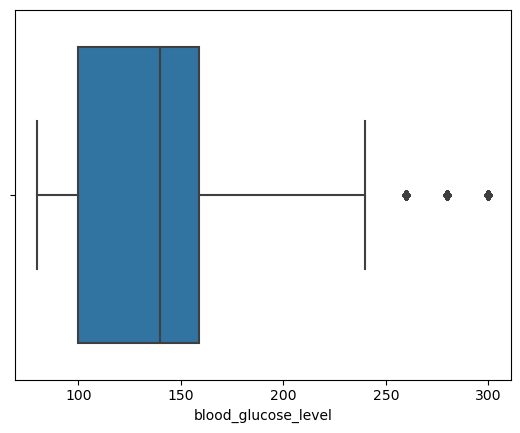

In [60]:
sns.boxplot(data=df,x="blood_glucose_level")     ## To see the distribution of blood_glucose_level data

11.5 247.5


<Axes: xlabel='blood_glucose_level'>

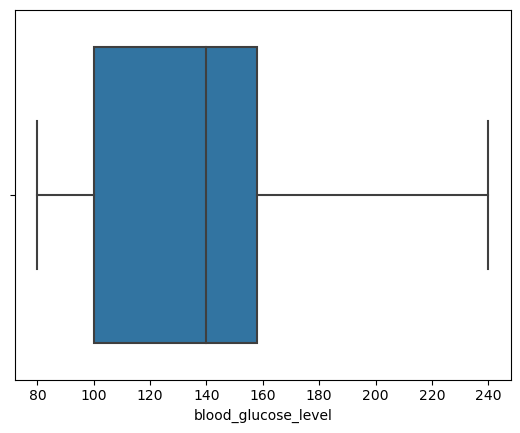

In [61]:
# calculate the IQR to detect outliers 
Q1 = np.percentile(df['blood_glucose_level'], 25)
Q3 = np.percentile(df['blood_glucose_level'], 75)
IQR = Q3 - Q1
# determine the upper and lower limits for outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
# remove the outliers
df = df[(df['blood_glucose_level'] >= lower_limit) & (df['blood_glucose_level'] <= upper_limit)]
sns.boxplot(data=df,x="blood_glucose_level")       ## After removing outliers 

In [62]:
df.corr()

C:\Users\Devesh Atole\AppData\Local\Temp\ipykernel_21240\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.255928,0.234206,0.404966,0.055765,0.049413,0.215886
hypertension,0.255928,1.000000,0.122328,0.135534,0.042942,0.039069,0.161844
heart_disease,0.234206,0.122328,1.000000,0.069214,0.036586,0.028800,0.145782
bmi,0.404966,0.135534,0.069214,1.000000,0.038096,0.033999,0.146629
HbA1c_level,0.055765,0.042942,0.036586,0.038096,1.000000,0.057744,0.264221
blood_glucose_level,0.049413,0.039069,0.028800,0.033999,0.057744,1.000000,0.218808
diabetes,0.215886,0.161844,0.145782,0.146629,0.264221,0.218808,1.000000


C:\Users\Devesh Atole\AppData\Local\Temp\ipykernel_21240\2805160936.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

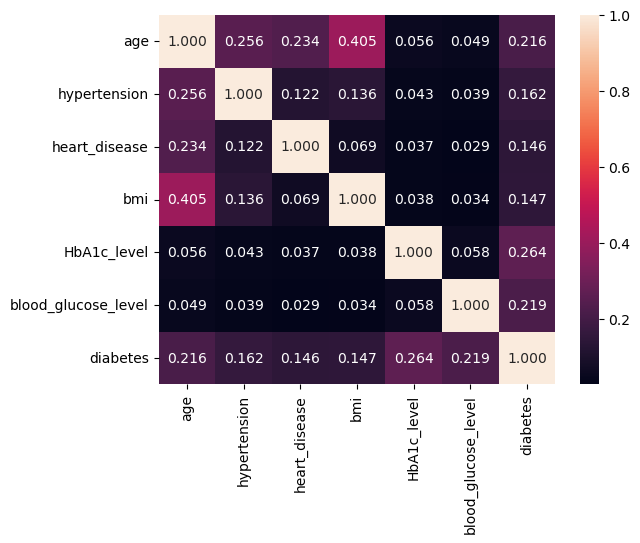

In [64]:
sns.heatmap(df.corr(),annot=True,fmt='.3f')   ## To see Co-reletion by heatmap visulaizatin

In [65]:
# count the number of people with diabetes equal to 1 and 0
diabetes_counts = df['diabetes'].value_counts()

# create the pie chart
fig = go.Figure(data=[go.Pie(labels=['No Diabetes', 'Diabetes'], values=diabetes_counts, 
                             hole=.3,)])

# update the layout
fig.update_layout(title='Diabetes Distribution')

# show the plot
fig.show()

## Now we start preprosessing
with encoding

In [85]:
X=pd.get_dummies(df,columns=["smoking_history"],drop_first=True)   ## USING ONE-HOT ENCODING

In [97]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,1,0,0,0,0


In [87]:
y=df["diabetes"]         ## Setting up Target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [90]:
X=X.drop("diabetes",axis=1)   ## Deleting Target from data

In [94]:
from sklearn.preprocessing import LabelEncoder        ## Using Lable encoding
le=LabelEncoder()
X["gender"]=le.fit_transform(X["gender"])

In [95]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,1,0,0,0,0


In [ ]:
## seprating data in 80-20 portion for model training and testing

In [110]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21,test_size=0.25)

In [127]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [112]:
logistic_r_model=lr.fit(x_train,y_train)

C:\Users\Devesh Atole\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [113]:
Y_pred=lr.predict(X_test)

In [114]:
accuracy_score(Y_pred,y_test)      ## BY LOGISTIC REGRESSION MODEL ACCURACY IS 96.188%

0.9618576806204363

In [115]:
confusion_matrix(Y_pred,y_test)

array([[20809,   699],
       [  142,   399]], dtype=int64)

In [116]:
adb=AdaBoostClassifier()
abd_model=adb.fit(x_train,y_train)           ## BY ADABOOST MODEL ACCURACY IS 97.42%

In [117]:
Y_pred_byABD=abd_model.predict(X_test)

In [121]:
accuracy_score(Y_pred_byABD,y_test)

0.9741031339289764

In [159]:
confusion_matrix(Y_pred_byABD,y_test)

array([[20924,   544],
       [   27,   554]], dtype=int64)

In [129]:
rf=RandomForestClassifier()                       ## BY Random_forest MODEL ACCURACY IS 97.42%
rf_model=rf.fit(x_train,y_train)

In [130]:
Y_pred_RF=rf_model.predict(X_test)

In [131]:
accuracy_score(Y_pred_RF,y_test)

0.9725611138827158

In [160]:
confusion_matrix(Y_pred_RF,y_test)

array([[20890,   544],
       [   61,   554]], dtype=int64)

In [156]:
L_svm=LinearSVC(dual=False,random_state=250)         ## ## BY Linier support vector MODEL ACCURACY IS 97.42%
L_svm=LinearSVC(dual=False,random_state=250)         
L_svm_model=L_svm.fit(x_train,y_train)

In [157]:
Y_pred_L_svm=L_svm_model.predict(X_test)

In [158]:
accuracy_score(Y_pred_L_svm,y_test)

0.9634904077282417

In [161]:
confusion_matrix(Y_pred_L_svm,y_test)

array([[20891,   745],
       [   60,   353]], dtype=int64)

In [162]:
print("Logistic R MODEL ACCURACY IS =",accuracy_score(Y_pred,y_test))
print("Adaboost MODEL ACCURACY IS =",accuracy_score(Y_pred_byABD,y_test))
print("Random Forest MODEL ACCURACY IS =",accuracy_score(Y_pred_RF,y_test))
print("Linier support vector MODEL ACCURACY IS =",accuracy_score(Y_pred_L_svm,y_test))


Logistic R MODEL ACCURACY IS = 0.9618576806204363
Adaboost MODEL ACCURACY IS = 0.9741031339289764
Random Forest MODEL ACCURACY IS = 0.9725611138827158
Linier support vector MODEL ACCURACY IS = 0.9634904077282417


## MODEL ADABOOST
After appling models we found adaboost model is giving highest accuracy 97.42%
